In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
ground = "with_ground"
# ground = "no_ground"
seq_name = f"160906_band2_{ground}"
logID = 1
metric = "pointssim"
splits = ["static", "dynamic"]
# culling = "s_nocull_c_nocull"
culling = "s_cull_c_cull"

static_data_dir = (
    f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_static_split/{seq_name}/"
)

dynamic_data_dir = (
    f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_dynamic_split/{seq_name}/"
)

In [27]:
data_dict = {"static": {}, "dynamic": {}}

In [28]:
data_dir = os.path.join(static_data_dir, f"comp_o3d_{metric}_{culling}", f"log{logID}")
bitrates = [60000, 80000, 120000, 160000, 200000]

metric_names = ["PSSIM_GEO_AB", "PSSIM_COLOR_AB"]
exp_names = ["PSSIM_GEO_GT_DIST", "PSSIM_COLOR_GT_DIST"]

print("Static Split:")
for bitrate in bitrates:
    pssim_path = os.path.join(data_dir, f"3D_{bitrate}k_pssim.csv")
    if not os.path.exists(pssim_path):
        raise FileNotFoundError(f"{pssim_path} not found")
    data = pd.read_csv(pssim_path)
    data_dict["static"][bitrate] = data

    avg_pssim_geo_ba = np.mean(data["PSSIM_GEO_AB"])
    avg_pssim_color_ba = np.mean(data["PSSIM_COLOR_AB"])

    print(
        f"bitrate={bitrate} kbps, avg_pssim_geo={avg_pssim_geo_ba:.2f}, avg_pssim_color={avg_pssim_color_ba:.2f}"
    )

Static Split:
bitrate=60000 kbps, avg_pssim_geo=89.38, avg_pssim_color=79.19
bitrate=80000 kbps, avg_pssim_geo=90.39, avg_pssim_color=79.80
bitrate=120000 kbps, avg_pssim_geo=90.41, avg_pssim_color=80.25
bitrate=160000 kbps, avg_pssim_geo=90.42, avg_pssim_color=80.40
bitrate=200000 kbps, avg_pssim_geo=90.42, avg_pssim_color=80.49


In [29]:
data_dir = os.path.join(dynamic_data_dir, f"comp_o3d_{metric}_{culling}", f"log{logID}")
bitrates = [60000, 80000, 120000, 160000, 200000]

metric_names = ["PSSIM_GEO_AB", "PSSIM_COLOR_AB"]
exp_names = ["PSSIM_GEO_GT_DIST", "PSSIM_COLOR_GT_DIST"]

print("Dynamic Split:")
for bitrate in bitrates:
    pssim_path = os.path.join(data_dir, f"3D_{bitrate}k_pssim.csv")
    if not os.path.exists(pssim_path):
        raise FileNotFoundError(f"{pssim_path} not found")
    data = pd.read_csv(pssim_path)
    data_dict["dynamic"][bitrate] = data

    avg_pssim_geo_ba = np.mean(data["PSSIM_GEO_AB"])
    avg_pssim_color_ba = np.mean(data["PSSIM_COLOR_AB"])
    print(
        f"bitrate={bitrate} kbps, avg_pssim_geo={avg_pssim_geo_ba:.2f}, avg_pssim_color={avg_pssim_color_ba:.2f}"
    )

Dynamic Split:
bitrate=60000 kbps, avg_pssim_geo=89.57, avg_pssim_color=79.13
bitrate=80000 kbps, avg_pssim_geo=90.40, avg_pssim_color=79.17
bitrate=120000 kbps, avg_pssim_geo=90.35, avg_pssim_color=79.33
bitrate=160000 kbps, avg_pssim_geo=90.42, avg_pssim_color=80.41
bitrate=200000 kbps, avg_pssim_geo=90.42, avg_pssim_color=80.49


In [30]:
# plot split vs frame id
dynamic_data_dir = (
    f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_dynamic_split/{seq_name}/"
)

data_dir = os.path.join(dynamic_data_dir, f"bitrate_split_{culling}", f"log{logID}")
bitrates = [60000, 80000, 120000, 160000, 200000]

data_dict = {}
for bitrate in bitrates:
    data_path = os.path.join(data_dir, f"rmse_split{bitrate}_adapt.txt")
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"{data_path} not found")
    data = pd.read_csv(data_path)
    data_dict[bitrate] = data

data_dict[60000]

,FrameID,cRMSE,dRMSE,d2c_split,dRMSE-cRMSE,step_size,Time
0,100,4.54806,4.60950,0.875000,0.061442,0.000614,23
1,102,4.55966,4.61640,0.875000,0.056736,0.000567,23
2,104,4.57393,3.58172,0.875000,-0.992210,-0.009922,28
3,106,4.59102,4.91128,0.875000,0.320261,0.003203,27
4,108,4.90601,4.93909,0.875000,0.033083,0.000331,27
...,...,...,...,...,...,...,...
4934,5513,5.43089,5.98771,0.815328,0.556820,0.005568,27
4935,5514,5.40827,5.99106,0.815328,0.582790,0.005828,26
4936,5515,5.43437,6.44973,0.825482,1.015350,0.010153,25
4937,5516,5.45063,6.48507,0.835826,1.034440,0.010344,21


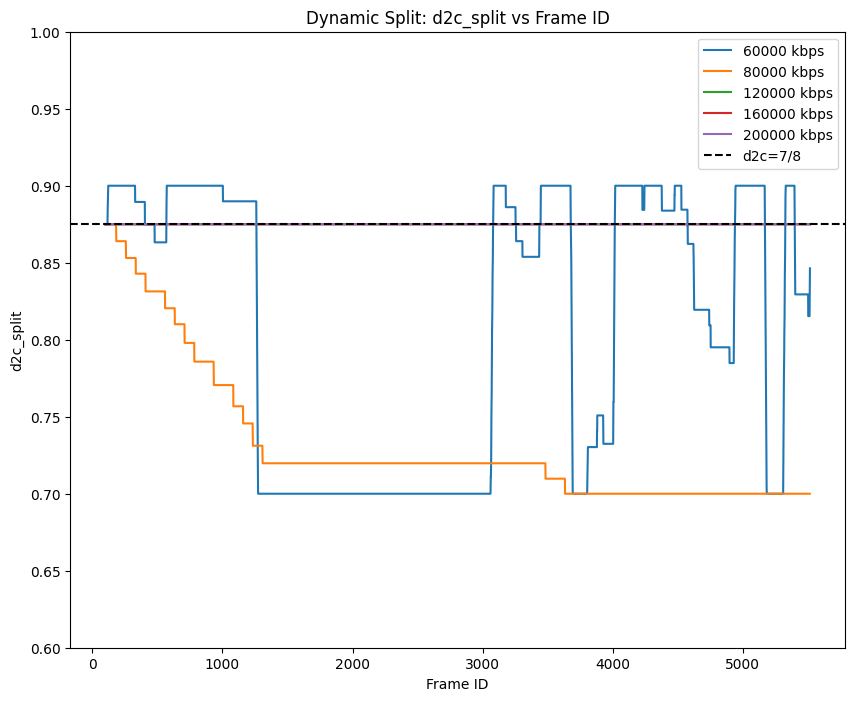

In [31]:
# plot split vs frame id

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(data["FrameID"], data["d2c_split"], label=f"{bitrate} kbps")
ax.set_xlabel("Frame ID")
ax.set_ylabel("d2c_split")
ax.set_ylim([0.6, 1])

# draw horizontal line at y=0.875
ax.axhline(y=0.875, color="k", linestyle="--", label="d2c=7/8")
ax.legend()
ax.title.set_text(f"Dynamic Split: d2c_split vs Frame ID")
plt.show()

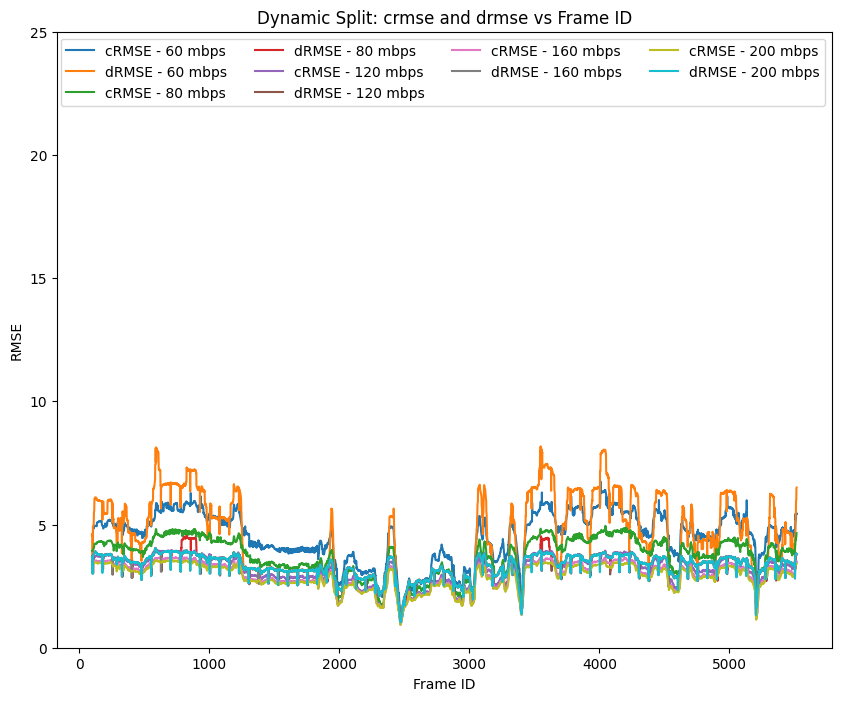

In [32]:
# plot crmse and drmse vs frame id
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(data["FrameID"], data["cRMSE"], label=f"cRMSE - {bitrate//1000} mbps")
    ax.plot(data["FrameID"], data["dRMSE"], label=f"dRMSE - {bitrate//1000} mbps")
ax.set_xlabel("Frame ID")
ax.set_ylabel("RMSE")
ax.legend(ncol=4)
ax.title.set_text(f"Dynamic Split: crmse and drmse vs Frame ID")
ax.set_ylim([0, 25])
plt.show()

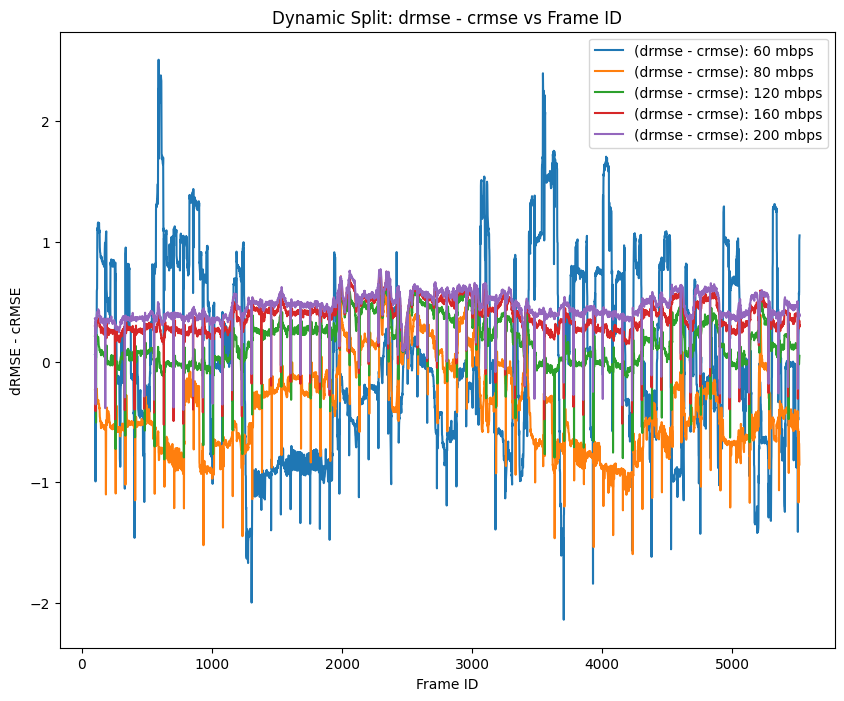

In [33]:
# plot drmse - cmrse vs frame id
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(
        data["FrameID"],
        data["dRMSE-cRMSE"],
        label=f"(drmse - crmse): {bitrate//1000} mbps",
    )
ax.set_xlabel("Frame ID")
ax.set_ylabel("dRMSE - cRMSE")
ax.legend()
ax.title.set_text(f"Dynamic Split: drmse - crmse vs Frame ID")
plt.show()